In [1]:
# %%bash: 아래 명령어는 bash 이다.
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InR

In [2]:
# JAVA 환경변수 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
# %%bash: 아래 명령어는 bash 이다.
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.

In [4]:
import pandas as pd
from konlpy.tag import Mecab
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
m = Mecab()

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2132k      0 --:--:-- --:--:-- --:--:-- 5024k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [5]:
# google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# econoi.json 가져오기
filename = '/content/drive/MyDrive/Colab Notebooks/wordCloudPython/sojoong.json'
# Pandas 로 json 파일 가져오기
df = pd.read_json(filename, lines=True)
# df

In [15]:
noun = set(["NNG", "NNP", "NP"])
verb_adject = set(["VV", "VA"])


In [16]:
df.head(3)

,_id,news_url,news_title,news_author,news_date,news_article,news_source
0,{'$oid': '61ff6cb87b05bfef77f0baf8'},https://sojoong.joins.com/archives/44661,[뉴스레시피] 화산 폭발로 큰 피해를 입은 통가를 돕기 위해 힘을 모아봐요,한은정 기자,2022-01-24 08:02,대폭발로 사라진 화산섬···통가의 영웅 “조국 도와달라” “통가는 도움이 절실합니다...,소년중앙
1,{'$oid': '61ff6cb87b05bfef77f0baf9'},https://sojoong.joins.com/archives/44648,"[위클리이슈] 통가 화산 폭발, 그 영향은 어디까지일까",한은정 기자,2022-01-24 08:01,"통가 화산 폭발, 그 영향은 어디까지일까남태평양 섬나라 통가에서 대규모 해저화산 분...",소년중앙
2,{'$oid': '61ff6cb87b05bfef77f0bafa'},https://sojoong.joins.com/archives/44506,[뉴스레시피] 횡령 범죄를 보고 느낀 점과 문제 해결 방법을 위한 여러분의 생각을 ...,한은정 기자,2022-01-17 08:31,‘1800억대 상장사 횡령사건’ 기업 투명성 제고 계기로 삼아야 1800억원대의 역...,소년중앙


In [17]:
word_list = []
for news_title in df['news_title'].to_list():
    for word,tag in m.pos(news_title):
        if tag in verb_adject:
            word_list.append(word+"다")
        elif tag in noun:
            word_list.append(word)

In [18]:
num = 150
counts = Counter(word_list)
selected = counts.most_common(num)
# print(selected)

In [19]:
wc = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/wordCloudPython/fonts/BMJUA_otf.otf', 
               background_color="white", 
               max_font_size=60)


In [20]:
cloud = wc.generate_from_frequencies(dict(selected))
# save as file
# cloud.to_file('test.jpg')

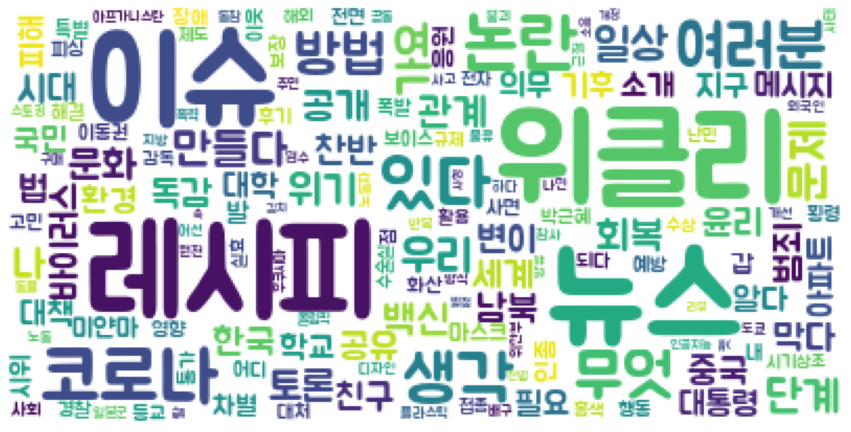

In [21]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()